In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Load the dataset
df = pd.read_csv(r'C:\Users\Lenovo\Projects\Olympics Data Analysis\Olympics.csv', encoding='latin1')

In [4]:
# Clean the dataset
df.drop_duplicates(inplace=True)
df.fillna({'Medal': 'No Medal'}, inplace=True)  # Treat missing medals as 'No Medal'
df.dropna(inplace=True)  # Drop rows with other missing values

In [4]:
#Summary of the dataset
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15316 entries, 0 to 15315
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          15316 non-null  object
 1   Year          15316 non-null  int64 
 2   Sport         15316 non-null  object
 3   Discipline    15316 non-null  object
 4   Event         15316 non-null  object
 5   Athlete       15316 non-null  object
 6   Gender        15316 non-null  object
 7   Country_Code  15316 non-null  object
 8   Country       15316 non-null  object
 9   Event_gender  15316 non-null  object
 10  Medal         15316 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.3+ MB
None
               Year
count  15316.000000
mean    1993.620789
std       10.159851
min     1976.000000
25%     1984.000000
50%     1996.000000
75%     2004.000000
max     2008.000000


In [5]:
#2. Exploratory Data Analysis (EDA)

In [6]:
# Summary statistics
print(df.describe(include='all'))

           City          Year     Sport Discipline   Event          Athlete  \
count     15315  15315.000000     15315      15315   15315            15315   
unique        9           NaN        28         41     293            11337   
top     Beijing           NaN  Aquatics  Athletics  hockey  PHELPS, Michael   
freq       2042           NaN      2210       1523     816               16   
mean        NaN   1993.621678       NaN        NaN     NaN              NaN   
std         NaN     10.159586       NaN        NaN     NaN              NaN   
min         NaN   1976.000000       NaN        NaN     NaN              NaN   
25%         NaN   1984.000000       NaN        NaN     NaN              NaN   
50%         NaN   1996.000000       NaN        NaN     NaN              NaN   
75%         NaN   2004.000000       NaN        NaN     NaN              NaN   
max         NaN   2008.000000       NaN        NaN     NaN              NaN   

       Gender Country_Code        Country Event_gen

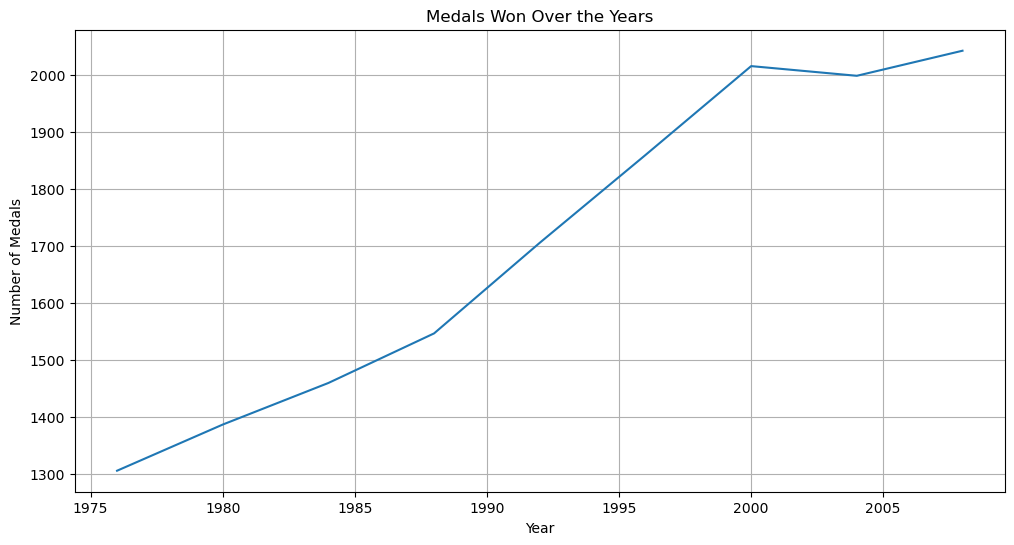

In [7]:
# Medals across years
medals_by_year = df[df['Medal'] != 'No Medal'].groupby('Year')['Medal'].count()
plt.figure(figsize=(12,6))
sns.lineplot(x=medals_by_year.index, y=medals_by_year.values)
plt.title('Medals Won Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

In [10]:
# Top-performing athletes
top_athletes = df[df['Medal'] != 'No Medal']['Athlete'].value_counts().head(10)
print("Top 10 Athletes by Medal Count:\n", top_athletes)

Top 10 Athletes by Medal Count:
 Athlete
PHELPS, Michael        16
ANDRIANOV, Nikolay     12
TORRES, Dara           12
NEMOV, Alexei          12
FISCHER, Birgit        12
THOMPSON, Jenny        12
COUGHLIN, Natalie      11
BIONDI, Matthew        11
DITYATIN, Aleksandr    10
LEWIS, Carl            10
Name: count, dtype: int64


In [11]:
# Top-performing countries
top_countries = df[df['Medal'] != 'No Medal']['Country'].value_counts().head(10)
print("Top 10 Countries by Medal Count:\n", top_countries)

Top 10 Countries by Medal Count:
 Country
United States     1992
Soviet Union      1021
Australia          798
Germany            691
China              679
Russia             638
East Germany       626
Italy              486
Romania            482
United Kingdom     467
Name: count, dtype: int64


In [12]:
# 3. Visualizing Key Insights

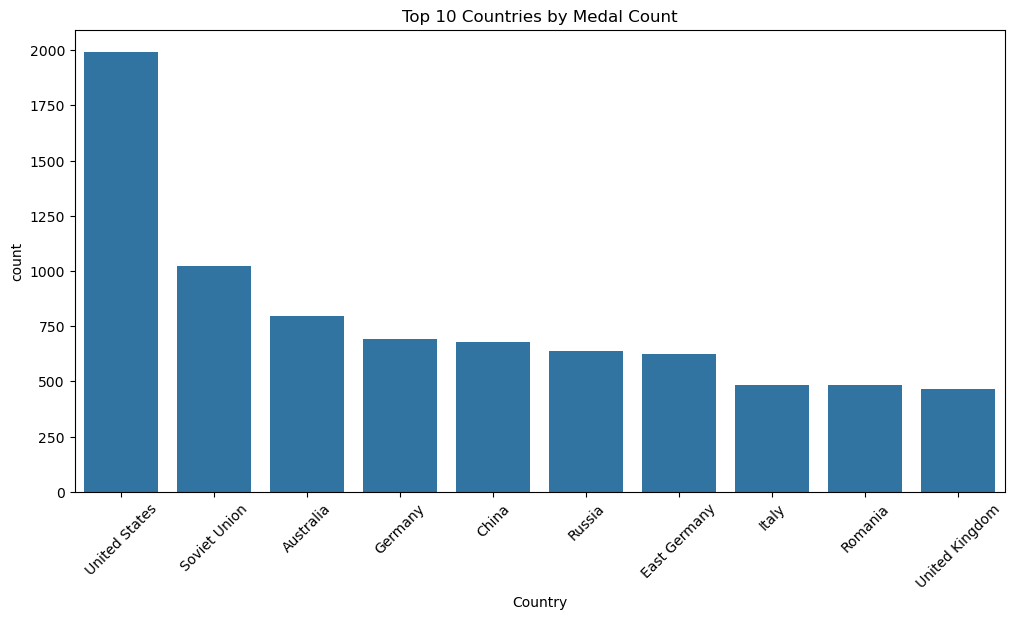

In [15]:
# Medals by country
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Medal'] != 'No Medal'], x='Country', order=df['Country'].value_counts().iloc[:10].index)
plt.title('Top 10 Countries by Medal Count')
plt.xticks(rotation=45)
plt.show()

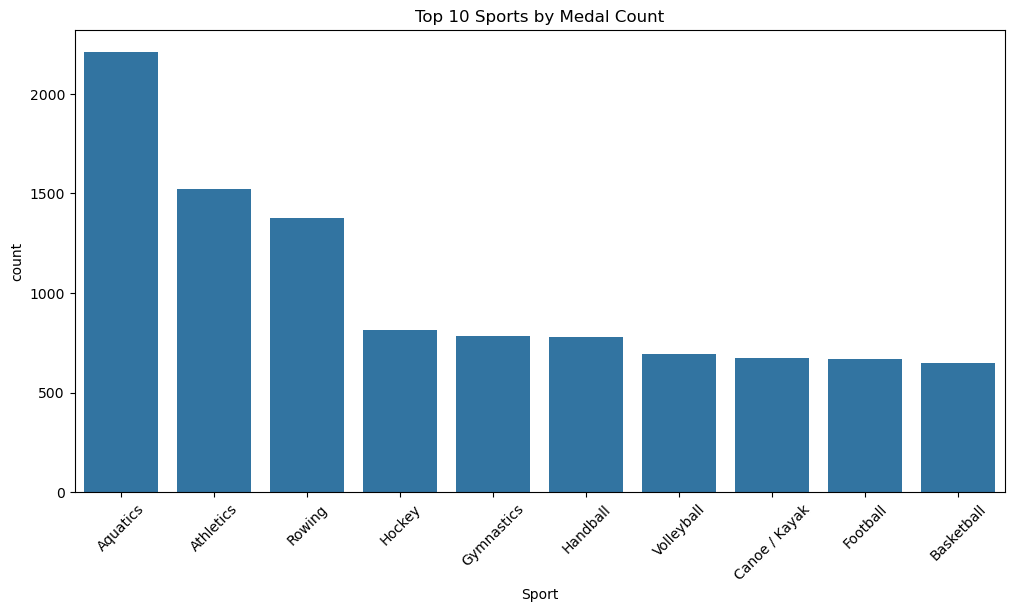

In [16]:
# Medals by sport
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Medal'] != 'No Medal'], x='Sport', order=df['Sport'].value_counts().iloc[:10].index)
plt.title('Top 10 Sports by Medal Count')
plt.xticks(rotation=45)
plt.show()

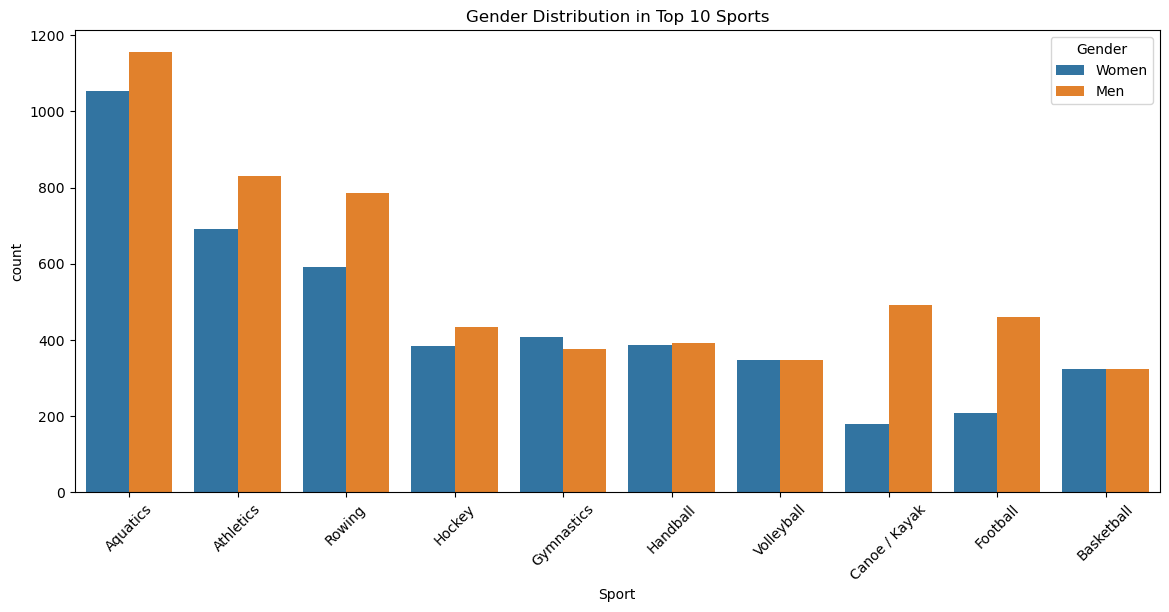

In [18]:
# Gender distribution across sports
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Sport', hue='Gender', order=df['Sport'].value_counts().iloc[:10].index)
plt.title('Gender Distribution in Top 10 Sports')
plt.xticks(rotation=45)
plt.show()

In [19]:
#4. Predictive Analysis

In [21]:
# Encode categorical variables
df_model = df.copy()
df_model['Medal_binary'] = df_model['Medal'].apply(lambda x: 0 if x == 'No Medal' else 1)
df_model = pd.get_dummies(df_model[['Gender', 'Country', 'Sport', 'Medal_binary']], drop_first=True)

In [22]:
# Train-test split
X = df_model.drop('Medal_binary', axis=1)
y = df_model['Medal_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3063

    accuracy                           1.00      3063
   macro avg       1.00      1.00      1.00      3063
weighted avg       1.00      1.00      1.00      3063

